# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [49]:
from commonfunctions import *
from commonfunctions import showHist as showHistCommon
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

In [28]:
'''
1
Negative Transformation
'''

picture1 = io.imread('./imgs/Picture1.png')
picture1 = rgb2gray(picture1[:,:,:3])
picture2 = io.imread('./imgs/Picture2.png')
picture2 = rgb2gray(picture2[:,:,:3])

In [29]:
def Negative(img,thres):
    myImg = np.copy(img)
    return (thres - myImg)

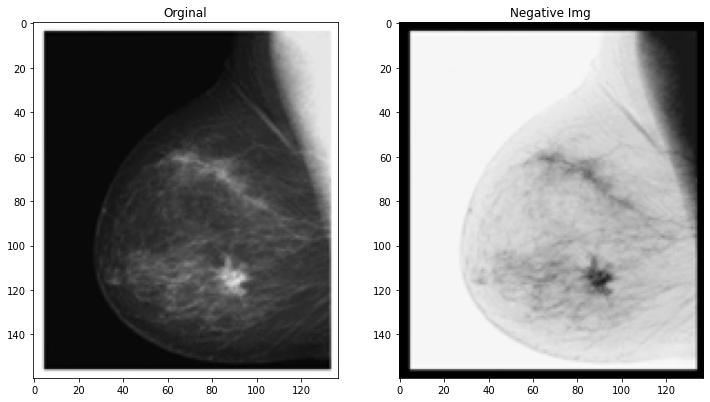

In [30]:
negImg =  Negative(picture1,255)
show_images([picture1,negImg],['Orginal','Negative Img'])

In [176]:
'''
2
Contrast Enhancement
'''
def contrastEnhancementEquation(x):
    return (3/2.0) * x + 50

def contrastEnhancement(img):
    newImg = np.copy(img)
    N,M= newImg.shape
    for i in range(N):
        for j in range(M):
            if newImg[i,j] < 100:
                newImg[i,j] = contrastEnhancementEquation(newImg[i,j])
    return newImg


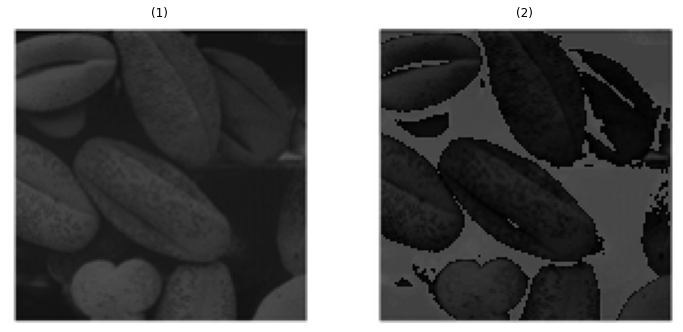

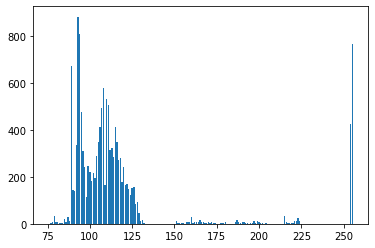

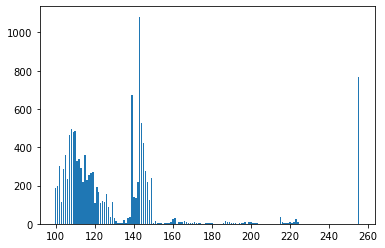

In [186]:

newPic2 = contrastEnhancement(picture2*256)
show_images([picture2,newPic2])
showHistCommon(picture2*256)
showHistCommon(newPic2)
# print(newPic2.astype(np.uint8))
# print(picture2.astype(np.uint8))

In [35]:
'''
3
Gamma Correction
'''
def Gamma_Correction(img, c, gamma):
    newImg = np.copy(img)
    return c * (newImg ** gamma)



In [36]:
# Gamma = 3
# Output image is darker
newImg1 = Gamma_Correction(picture2, 1, 3)


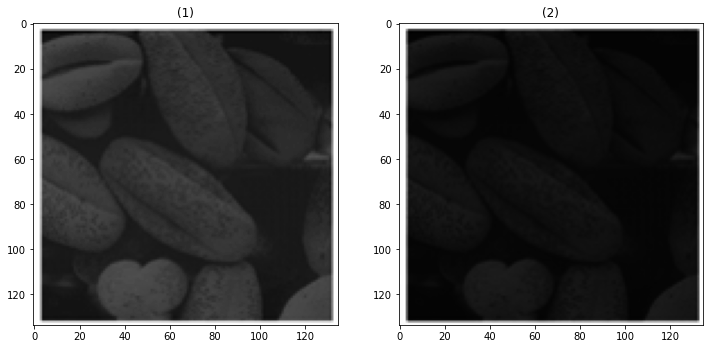

In [37]:
show_images([picture2,newImg1])

In [38]:
# Gamma = 0.5
# Output image is brighter
newImg2 = Gamma_Correction(picture2, 1, 0.5)

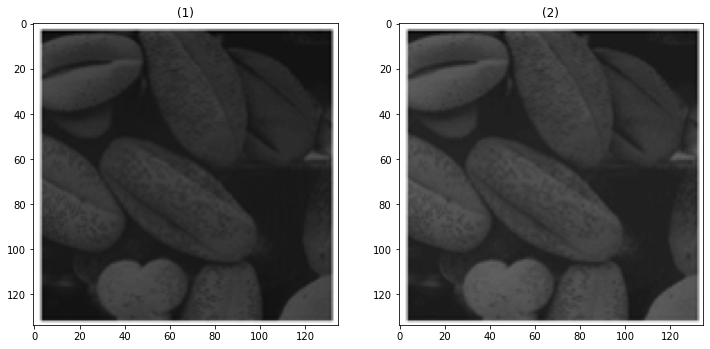

In [39]:
show_images([picture2,newImg2])

In [40]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''
def getImageWithHist(name,ext,nbins=256):
    pass
    



In [44]:
poutImg = io.imread('./imgs/pout.tif')
tireImg = io.imread('./imgs/tire.tif')

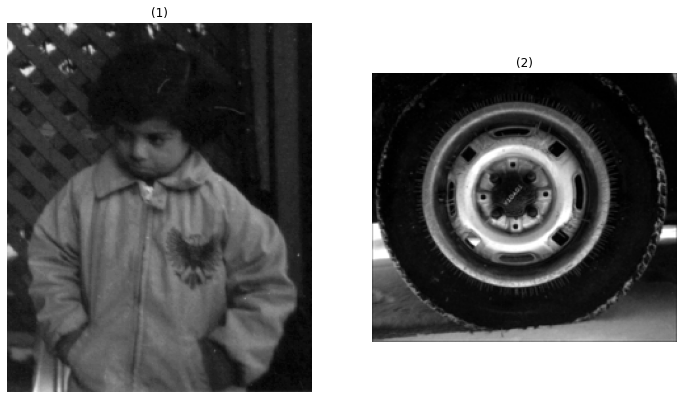

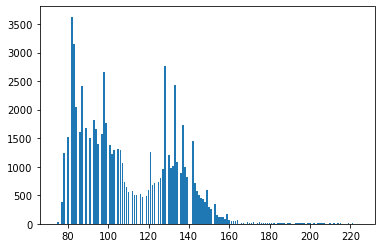

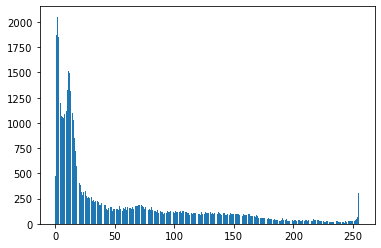

In [50]:
show_images([poutImg, tireImg])
showHistCommon(poutImg)
showHistCommon(tireImg)

In [153]:

def histogramEqualization(img, G=256):
    newImg = np.copy(img)
    newImg = newImg.astype(np.uint8)
    H = np.zeros((G))
    H_c = np.zeros((G))
    T = np.zeros((G))
    (N, M) = newImg.shape
    # print(N)
    # print(M)
    H = histogram(newImg, nbins=G)

    peterArr = np.zeros(G)
    for i in range(H.shape[0]):
        for j in range(H.shape[1]):
            peterArr[j] = H[]


    print(H)
    H_c[0] = H[0]
    for p in range(1,H.shape[0]):
        H_c[p] = H_c[p-1] + H[p]
        T[p] = round((G - 1)*H_c[p]/(N*M))

    for i in range(N):
        for j in range(M):
            newImg[i,j] =  T[newImg[i,j]]            
    return newImg






In [154]:
equalizationImg1 = histogramEqualization(poutImg,256)
equalizationImg2 = histogramEqualization(tireImg,256)
show_images([poutImg, equalizationImg1])
showHistCommon(poutImg)
showHistCommon(equalizationImg1)
show_images([tireImg, equalizationImg2])
showHistCommon(tireImg)
showHistCommon(equalizationImg2)

(array([   2,   38,    0,  389, 1245,    0, 1518,    0, 3628, 3146, 2041,
          0, 1601, 2415,    0, 1684,    0, 1506,    0, 1813, 1660, 1390,
          0, 1572, 2662, 1761,    0, 1387, 1218, 1287,    0, 1308, 1288,
       1068,  732,  639,  559,    0,  575,  504,  502,    0,  518,  476,
          0,  490,  599, 1263,  686,  708,    0,  724,  804,  957, 2770,
          0, 1200,  973, 1004, 2434, 1087,    0,  892, 1737,  995,  813,
          0,    0, 1459,  723,  576,  512,  448,  431,  377,  600,  296,
        266,    0,  354,  154,  121,  113,  113,   91,  163,   58,   53,
         50,   51,   67,    0,   20,   21,    0,   36,   10,   12,   24,
          0,   13,   30,    6,   13,   11,   11,    9,    9,    9,    0,
         19,   13,   16,    6,    0,   18,    6,    0,    5,    7,    6,
          6,    8,   11,    0,    9,    9,    3,    8,    0,    9,    7,
          9,    7,    4,    5,   17,    4,    6,    4,   11,    7,    0,
          0,    2,    6,    2,    8,    0,    2,  

ValueError: setting an array element with a sequence.

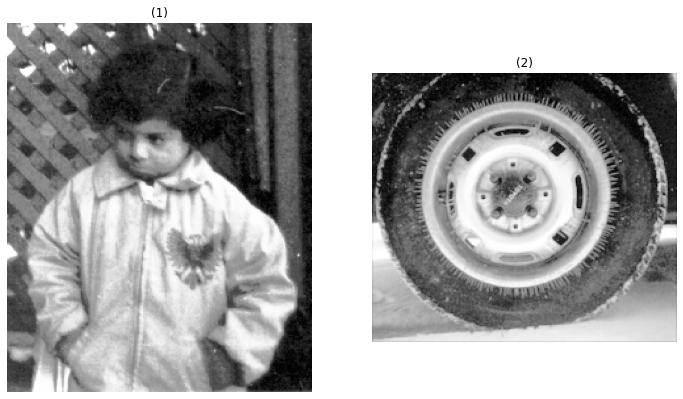

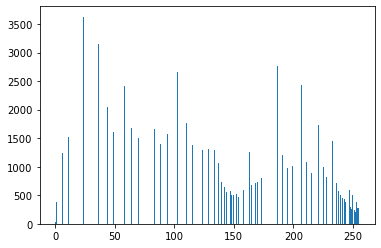

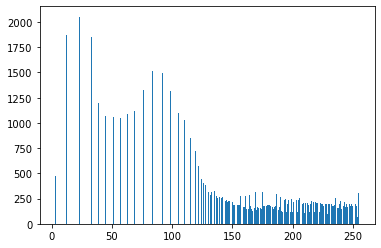

In [152]:
from skimage import io, exposure
y=exposure.equalize_hist(poutImg)
z=exposure.equalize_hist(tireImg)
show_images([y,z])
showHistCommon(y*256)
showHistCommon(z*256)

